<a href="https://colab.research.google.com/github/sql6001/IST-210/blob/master/GroupAssignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

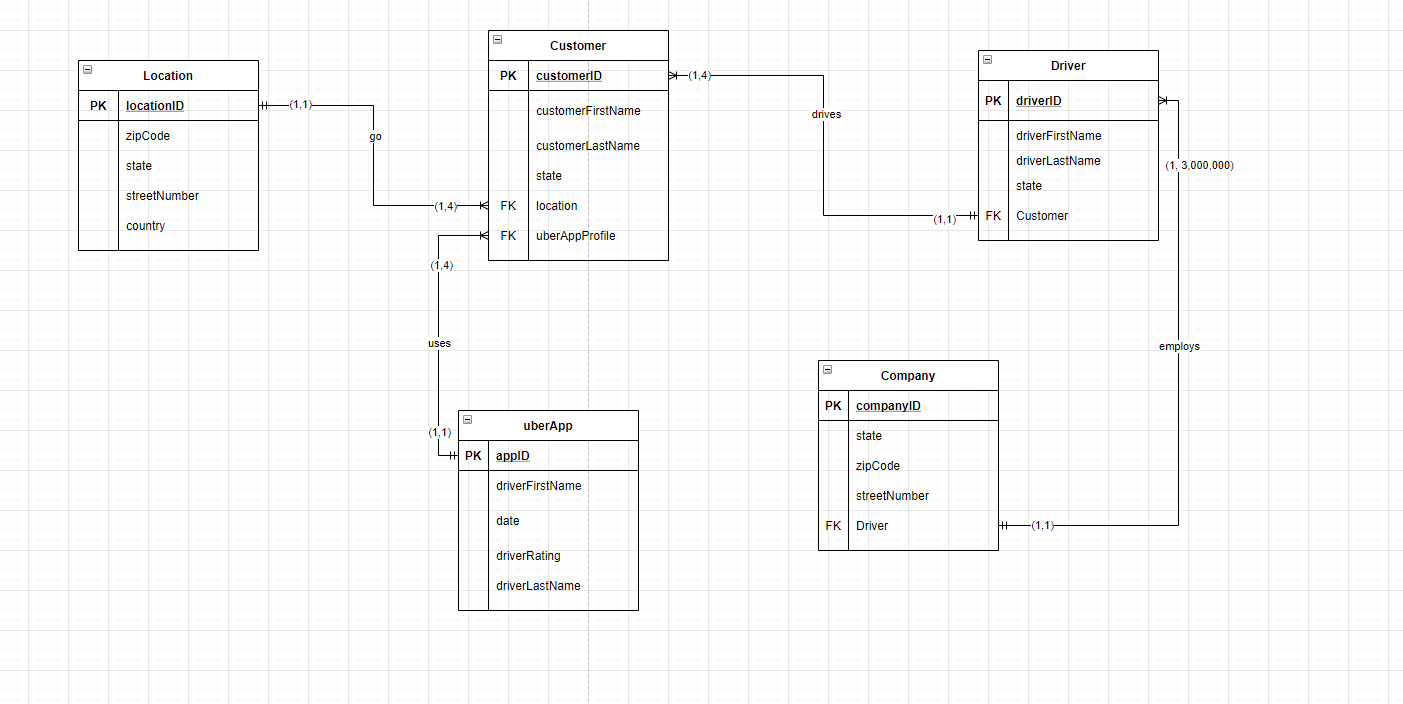

In [305]:
%load_ext sql
%sql sqlite:///uberBusiness.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: @uberBusiness.db'

In [306]:
%%sql
DROP TABLE IF EXISTS Location;
create table Location (locationID integer PRIMARY KEY, zipCode integer, state text, streetNumber integer, country text);
DROP TABLE IF EXISTS Customer;
create table Customer (customerID integer PRIMARY KEY, customerFirstName text, customerLastName text, customerState text, location text);
DROP TABLE IF EXISTS Driver;
create table Driver (driverID integer PRIMARY KEY, driverFirstName text, driverLastName text, driverState text, customerFirstName text);
DROP TABLE IF EXISTS Company;
create table Company (companyID integer PRIMARY KEY, state text, zipCode integer, streetNumber text, DriverFirstName text);
DROP TABLE IF EXISTS uberApp;
create table uberApp (appID integer PRIMARY KEY, driverRating real, date text, driverFirstName text, driverLastName text)

 * sqlite:///uberBusiness.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [307]:
%%sql
insert into Location values ('31649', '15237', 'PA', '360 Cumberland Rd', 'United States');
insert into Location values ('97521', '16803', 'TX', '1617 N Atherton St', 'United States');
insert into Location values ('75540', '11223', 'NY', '50 Avenue X', 'United States');
insert into Location values ('38553', '92093', 'CA', '9500 Filman Dr', 'United States');
insert into Location values ('80818', '26506', 'WV', '387 1/2 High St', 'United States');

insert into Customer values ('5636985554', 'Moses', 'Hinton', 'PA', '360 Cumberland Rd');
insert into Customer values ('4523652846', 'Charlize', 'Swift', 'TX', '1617 N Atherton St');
insert into Customer values ('9826251623', 'Stacey', 'Kearns', 'NY', '50 Avenue X');
insert into Customer values ('4456565623', 'Sadia', 'Kay', 'CA', '9500 Filman Dr');
insert into Customer values ('1462633689', 'Nisha', 'Hodge', 'WV', '387 1/2 High St');

insert into Driver values ('1523658795', 'Rikki', 'Bonner', 'PA', "Moses");
insert into Driver values ('8529262655', 'Emil', 'Massey', 'TX', 'Chlarlize');
insert into Driver values ('7894523636', 'Danielle', 'Mcnally', 'NY', 'Stacey');
insert into Driver values ('5151565625', 'Jawad', 'Guzman', 'CA', 'Sadia');
insert into Driver values ('4845465959', 'Trinity', 'Barnard', 'WV', 'Nisha');

insert into Company values ('1112', 'CA', '94013', '1455 Market Street', 'Rikki');
insert into Company values ('1113', 'CA', '94013', '1455 Market Street', 'Emil');
insert into Company values ('1114', 'CA', '94013', '1445 Market Street', 'Danielle');
insert into Company values ('1115', 'CA', '94013', '1445 Market Street', 'Jawad');
insert into Company values ('1116', 'CA', '94013', '1445 Market Street', 'Trinity');


insert into uberApp values ('1452362541', '3.5', '2020-05-27', 'Rikki', 'Bonner');
insert into uberApp values ('5636515236', '4.5', '2020-07-26', 'Emil', 'Massey');
insert into uberApp values ('4856932111', '5.0', '2020-10-26', 'Danielle', 'Mcnally');
insert into uberApp values ('8452630145', '2.5', '2020-08-31', 'Jawad', 'Guzman');
insert into uberApp values ('4482615123', '4.0', '2020-07-07', 'Trinity', 'Barnard');



 * sqlite:///uberBusiness.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

What drivers are in the same state as Uber customers?

In [308]:
%%sql
SELECT d.driverFirstName, d.driverLastName, d.driverState, c.customerFirstName, c.customerLastName, c.customerState FROM Customer c, Driver d WHERE d.driverState = c.customerState;

 * sqlite:///uberBusiness.db
Done.


driverFirstName,driverLastName,driverState,customerFirstName,customerLastName,customerState
Trinity,Barnard,WV,Nisha,Hodge,WV
Jawad,Guzman,CA,Sadia,Kay,CA
Emil,Massey,TX,Charlize,Swift,TX
Rikki,Bonner,PA,Moses,Hinton,PA
Danielle,Mcnally,NY,Stacey,Kearns,NY


This question was important because it allows us to know which drivers and customers are near. This is important for customers to know how many drivers are in the area for supply/demand purposes. This is important for drivers in order to know how many people are in the area that need rides. The output for this question was as expected.

What location does each Uber customer want to travel to?

In [309]:
%%sql
SELECT c.customerFirstName, c.customerLastName, l.streetNumber, c.location FROM Customer c, Location l WHERE l.streetNumber = c.location

 * sqlite:///uberBusiness.db
Done.


customerFirstName,customerLastName,streetNumber,location
Nisha,Hodge,387 1/2 High St,387 1/2 High St
Sadia,Kay,9500 Filman Dr,9500 Filman Dr
Charlize,Swift,1617 N Atherton St,1617 N Atherton St
Moses,Hinton,360 Cumberland Rd,360 Cumberland Rd
Stacey,Kearns,50 Avenue X,50 Avenue X


This information is important for several different reasons. First of all, the driver needs to know where a customer wants to go in order to take them to the location. Additonally, the location may determine whether or not a driver would choose to take the customer to that location. Moreover, the location distance determines the cost of the ride. The output was as expected.

List each Uber driver by ranking in descending order.

In [310]:
%%sql
SELECT d.driverFirstName, d.driverLastName, a.driverRating FROM Driver d, uberApp a WHERE d.driverFirstName = a.driverFirstName ORDER BY a.driverRating DESC

 * sqlite:///uberBusiness.db
Done.


driverFirstName,driverLastName,driverRating
Danielle,Mcnally,5.0
Emil,Massey,4.5
Trinity,Barnard,4.0
Rikki,Bonner,3.5
Jawad,Guzman,2.5


This data is important to drivers, customers, and the company. A driver rating may impact the number of customers the driver gets as a customer would be less likely to chose a lower rated driver. Also, a low driver rating could result in the company choosing to terminate the driver. The output was as expected.